In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# # Sample data (replace with your actual rikishi data)
# data = {'Rikishi_ID': [1, 2, 3],
#         'Oshidashi_Wins': [3, 7, 8],
#         'Oshidashi_Losses': [1, 3, 2],
#         'Shiko_Wins': [5, 2, 1],
#         'Shiko_Losses': [2, 6, 8]}

# df = pd.DataFrame(data)

In [10]:
# Original data (Step 1) - Example
data = {
    'Rikishi_ID': [1, 1, 2, 2, 3],
    'Move_Type': ['Shiko', 'Oshidashi', 'Shiko', 'Oshidashi', 'Shiko'],
    'Win_Count': [5, 3, 2, 7, 8],
    'Loss_Count': [2, 1, 6, 3, 1]
}

In [11]:
# Create DataFrame
df = pd.DataFrame(data)

# Pivot the data to get a wide format with separate columns for Wins and Losses for each move
pivot_wins = df.pivot_table(index='Rikishi_ID', columns='Move_Type', values='Win_Count', aggfunc='sum', fill_value=0)
pivot_losses = df.pivot_table(index='Rikishi_ID', columns='Move_Type', values='Loss_Count', aggfunc='sum', fill_value=0)

# Rename the columns to include 'Wins' and 'Losses' for clarity
pivot_wins.columns = [f'{col}_Wins' for col in pivot_wins.columns]
pivot_losses.columns = [f'{col}_Losses' for col in pivot_losses.columns]

# Combine the wins and losses data
final_df = pd.concat([pivot_wins, pivot_losses], axis=1)

# Reset the index to make 'Rikishi_ID' a regular column
final_df.reset_index(inplace=True)

# change back
df = final_df

# Display the final DataFrame
print(final_df)

   Rikishi_ID  Oshidashi_Wins  Shiko_Wins  Oshidashi_Losses  Shiko_Losses
0           1               3           5                 1             2
1           2               7           2                 3             6
2           3               0           8                 0             1


In [12]:
# Normalize the data
scaler = StandardScaler()
X = df.drop(columns=['Rikishi_ID'])
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Shiko'

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

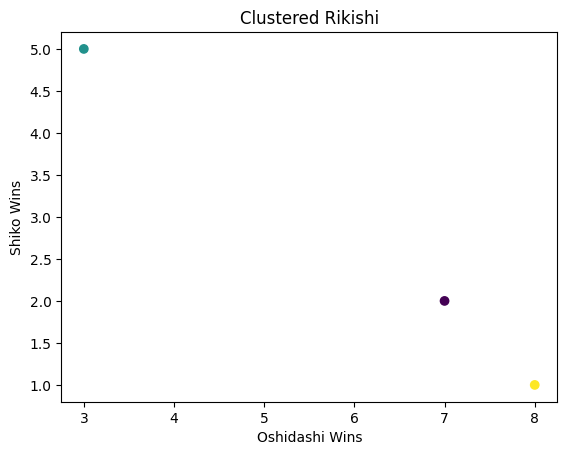

In [ ]:








# Visualize clusters (if necessary)
plt.scatter(df['Oshidashi_Wins'], df['Shiko_Wins'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Oshidashi Wins')
plt.ylabel('Shiko Wins')
plt.title('Clustered Rikishi')
plt.show()
